In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

## Reading in DataFrames from Files

Pandas has a number of very useful file reading tools. You can see them enumerated by typing "pd.re" and pressing tab. We'll be using read_csv today. 

In [119]:



data= pd.read_csv("enrollment.csv")








In [7]:
data.head(20)

,District,Location,School Type,Category,Composition,Number,Population,No/100000
0,Badin,Urban,Primary,INSTITUTIONS,TOTAL,168,"1,804,516",9.309976
1,Badin,Urban,Primary,INSTITUTIONS,MALE,30,"1,804,516",1.662496
2,Badin,Urban,Primary,INSTITUTIONS,FEMALE,27,"1,804,516",1.496246
3,Badin,Urban,Primary,INSTITUTIONS,MIXED,111,"1,804,516",6.151234
4,Badin,Urban,Primary,ENROLMENT,TOTAL,16446,"1,804,516",911.380115
5,Badin,Urban,Primary,ENROLMENT,MALE,10015,"1,804,516",554.996464
6,Badin,Urban,Primary,ENROLMENT,FEMALE,6431,"1,804,516",356.383651
7,Badin,Urban,Primary,TEACHING STAFF,TOTAL,550,"1,804,516",30.479087
8,Badin,Urban,Primary,TEACHING STAFF,MALE,382,"1,804,516",21.169111
9,Badin,Urban,Primary,TEACHING STAFF,FEMALE,168,"1,804,516",9.309976


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     3480 non-null   object 
 1   Location     3480 non-null   object 
 2   School Type  3480 non-null   object 
 3   Category     3480 non-null   object 
 4   Composition  3480 non-null   object 
 5   Number       3480 non-null   int64  
 6   Population   3480 non-null   object 
 7   No/100000    3480 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 217.6+ KB


In [118]:
data['District'].unique()

array(['South Karachi', 'West Karchi'], dtype=object)

In [120]:
data['Location'].unique()

#dropping totals:

data = data.drop(data[data['Location'] == 'Total'].index)

In [121]:
data['Location'].unique()

array(['Urban', 'Rural'], dtype=object)

In [122]:
print(data['School Type'].unique())
print(data['Category'].unique())
print(data['Composition'].unique())

#dropping totals:

data = data.drop(data[data['Category'] == 'INSTITUTIONS'].index)
data = data.drop(data[data['Category'] == 'ENROLMENT'].index)

data = data.drop(data[data['Composition'] == 'TOTAL'].index)

print(data['School Type'].unique())
print(data['Category'].unique())
print(data['Composition'].unique())

['Primary' 'Middle' 'Secondary' 'Higher secondary']
['INSTITUTIONS' 'ENROLMENT' 'TEACHING STAFF']
['TOTAL' 'MALE' 'FEMALE' 'MIXED']
['Primary' 'Middle' 'Secondary' 'Higher secondary']
['TEACHING STAFF']
['MALE' 'FEMALE']


In [22]:
data.head()

,District,Location,School Type,Category,Composition,Number,Population,No/100000
8,Badin,Urban,Primary,TEACHING STAFF,MALE,382,"1,804,516",21.169111
9,Badin,Urban,Primary,TEACHING STAFF,FEMALE,168,"1,804,516",9.309976
18,Badin,Urban,Middle,TEACHING STAFF,MALE,42,"1,804,516",2.327494
19,Badin,Urban,Middle,TEACHING STAFF,FEMALE,5,"1,804,516",0.277083
28,Badin,Urban,Secondary,TEACHING STAFF,MALE,224,"1,804,516",12.413301


In [123]:
data['Population'] = pd.to_numeric(data['Population'].str.replace(',', ''), errors='coerce').fillna(0)

# convert to integers
data['Population'] = data['Population'].astype(int)

In [124]:
data.loc[data['Composition'] == 'FEMALE', 'Composition'] = 'Female Teaching Staff'

In [125]:
data.loc[data['Composition'] == 'MALE', 'Composition'] = 'Male Teaching Staff'

#### Group by

In [126]:
res= data.groupby(["District", "Location","Category", "School Type","Composition"])
final= res.sum()
final


Number  \
District    Location Category       School Type      Composition                     
Badin       Rural    TEACHING STAFF Higher secondary Female Teaching Staff       3   
                                                     Male Teaching Staff        54   
                                    Middle           Female Teaching Staff      90   
                                                     Male Teaching Staff       245   
                                    Primary          Female Teaching Staff     509   
...                                                                            ...   
West Karchi Urban    TEACHING STAFF Middle           Male Teaching Staff       139   
                                    Primary          Female Teaching Staff     848   
                                                     Male Teaching Staff       671   
                                    Secondary        Female Teaching Staff     725   
                                                     Male Teaching Staff       405   

                                                                            Population  \
District    Location Category       School Type      Composition                         
Badin       Rural    TEACHING STAFF Higher secondary Female Teaching Staff     1804516   
                                                     Male Teaching Staff       1804516   
                                    Middle           Female Teaching Staff     1804516   
                                                     Male Teaching Staff       1804516   
                                    Primary          Female Teaching Staff     1804516   
...                                                                                ...   
West Karchi Urban    TEACHING STAFF Middle           Male Teaching Staff       3914757   
                                    Primary          Female Teaching Staff     3914757   
                                                     Male Teaching Staff       3914757   
                                    Secondary        Female Teaching Staff     3914757   
                                                     Male Teaching Staff       3914757   

                                                                            No/100000  
District    Location Category       School Type      Composition                       
Badin       Rural    TEACHING STAFF Higher secondary Female Teaching Staff   0.166250  
                                                     Male Teaching Staff     2.992492  
                                    Middle           Female Teaching Staff   4.987487  
                                                     Male Teaching Staff    13.577048  
                                    Primary          Female Teaching Staff  28.207010  
...                                                                               ...  
West Karchi Urban    TEACHING STAFF Middle           Male Teaching Staff     3.550667  
                                    Primary          Female Teaching Staff  21.661625  
                                                     Male Teaching Staff    17.140272  
                                    Secondary        Female Teaching Staff  18.519668  
                                                     Male Teaching Staff    10.345470  

[464 rows x 3 columns]

In [127]:
pivot = pd.pivot_table(final, values='No/100000', index='District', columns=['Composition', 'School Type', 'Location'], aggfunc='sum', fill_value=None, margins=False, margins_name='All', dropna=True, observed=False, sort=True)


In [145]:
pivot

Composition         Female Teaching Staff                                   \
School Type              Higher secondary                Middle              
Location                            Rural      Urban      Rural      Urban   
District                                                                     
Badin                            0.166250   6.483733   4.987487   0.277083   
Central Karachi                  0.000000   8.951328   0.000000  19.820798   
Dadu                             2.644707   3.547778   7.353577   0.387030   
East Karachi                     1.788498   4.505640   0.068788   3.576997   
Ghotki                           1.700765   2.490406   5.223778   0.971866   
Hyderabad                        1.363969  22.005371   3.182595  34.008301   
Jacobad                          2.086859   7.651817  10.732418   6.061829   
Jamshoro                         3.322788  11.277340   3.423478   1.308977   
Kamber Shahdadkot                2.460773   7.084044   7.382319   1.043964   
Kashmore                         0.831831   2.412310   1.830029   0.207958   
Khairpur Mirs                    2.287536   3.368916   9.857200   3.327325   
Korangi Karachi                  0.203499   2.075686   0.000000  11.151725   
Larkana                          9.249595   6.035197   6.625597   3.870398   
Malir Karachi                    3.285378   0.149335   4.579618   2.588480   
Matira                           1.429780   2.339640   1.559760   0.000000   
Mirpurkhaas                      5.777368  10.824264   6.707060   2.125009   
Naushero Feroz                   3.163040   9.923262  16.187321   1.488489   
Sanghar                          3.208467   6.028029   7.097518   6.562774   
Shaheed Benazirabad              0.744026   4.898171   7.068246   4.712164   
Shikarpur                        3.735340   3.166919   4.303761   2.354888   
South Karachi                    0.000000   5.413699   0.000000  15.348115   
Sujawal                          1.918240   6.138366   3.836479   0.895178   
Sukkhur                          4.032521   9.073172   4.234147  15.928458   
Tando Allah yar                  0.955924   9.439745   1.792357   5.616051   
Tando Muhammad Khan              0.000000   0.000000   3.691519   2.067251   
Tharparkar                       0.000000   0.121237   1.454844   0.969896   
Thatta                           2.653557   1.428838   5.919473   0.000000   
Umerkot                          2.329599   2.422783   3.447807   0.559104   
West Karchi                      0.076633   1.302763   1.072864   3.499579   

Composition                                                      \
School Type            Primary             Secondary              
Location                 Rural      Urban      Rural      Urban   
District                                                          
Badin                28.207010   9.309976  10.196640   8.644977   
Central Karachi       1.413368  66.832098   4.307406  66.798446   
Dadu                 50.055926  26.318064  13.030022  10.578830   
East Karachi          1.994864  23.284873   1.582133  41.307434   
Ghotki               27.515948   9.900882   4.069688   1.397057   
Hyderabad            11.320945  46.693216   2.637007  70.608144   
Jacobad              40.644064  24.147940   4.173718  17.589241   
Jamshoro             33.731329   9.464910  24.367110   3.624859   
Kamber Shahdadkot    50.781407  20.804718   8.053439   8.128008   
Kashmore             14.473863   2.953001   2.786634   1.705254   
Khairpur Mirs        44.669335  12.311102  13.184524  11.479270   
Korangi Karachi       1.261692  47.903577   2.075686  60.764691   
Larkana              55.628772  40.015980  12.201594  16.859192   
Malir Karachi        11.847274  14.585089   2.887151  17.223347   
Matira               33.534846  20.146903  15.727583  15.727583   
Mirpurkhaas          39.644699  29.484499  11.355517  20.453211   
Naushero Feroz       51.538943  17.117627   9.861242  10.853568   
Sanghar           

### Gender based 

In [150]:
##teaching staff discrepancies amongst districts and rural urban
female_rural_teachers_HS = pivot[pivot.columns[0] ]
male_rural_teachers_HS =  pivot[pivot.columns[8] ]

female_rural_teachers_M = pivot[pivot.columns[2] ]
male_rural_teachers_M =  pivot[pivot.columns[10] ]

female_rural_teachers_P = pivot[pivot.columns[4] ]
male_rural_teachers_P =  pivot[pivot.columns[12] ]

female_rural_teachers_S = pivot[pivot.columns[6] ]
male_rural_teachers_S =  pivot[pivot.columns[14] ]

In [154]:
female_rural = female_rural_teachers_HS +female_rural_teachers_M +female_rural_teachers_P+female_rural_teachers_S
male_rural = male_rural_teachers_HS +male_rural_teachers_M +male_rural_teachers_P+male_rural_teachers_S

In [155]:
rural_teachers = pd.DataFrame({ 'Female' : female_rural , 'Male' : male_rural})

In [156]:
rural_teachers['Total'] = rural_teachers[['Female', 'Male']].sum(axis=1)

In [172]:
rural_teachers

,Female,Male,Total
District,,,
Badin,43.557386,228.593152,272.150538
Central Karachi,5.720774,2.052748,7.773522
Dadu,73.084232,273.630461,346.714693
East Karachi,5.434284,2.957901,8.392185
Ghotki,38.510178,232.032937,270.543115
Hyderabad,18.504517,54.877031,73.381548
Jacobad,57.637059,300.607077,358.244137
Jamshoro,64.844705,153.653757,218.498462
Kamber Shahdadkot,68.677938,246.822993,315.500931


In [176]:
# add up rows 1, 3, 10, 12, 14, and 21
summed_row = rural_teachers.iloc[[1, 3, 10, 12, 14, 21]].sum(axis=0)

# assign the summed row to a new row in the DataFrame
rural_teachers.loc['Karachi'] = summed_row


<AxesSubplot:xlabel='District'>

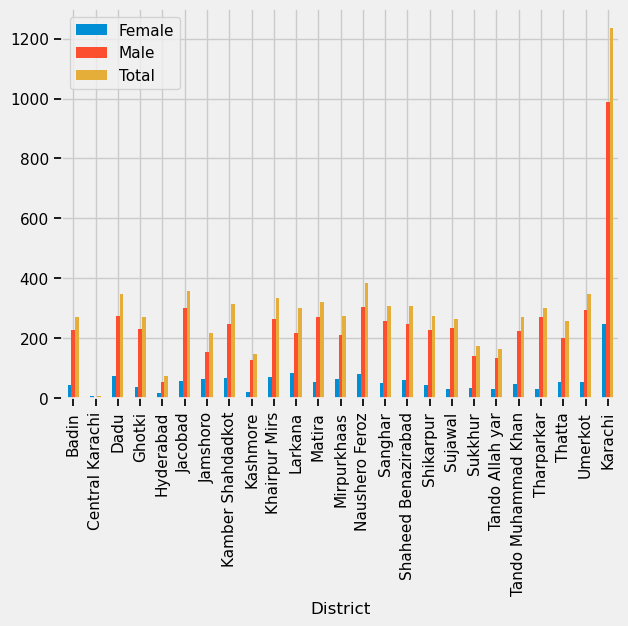

In [178]:
rural_teachers = rural_teachers.drop(['Central Karachi', 'East Karachi', 'Korangi Karachi' , 'Malir Karachi' , 'West Karchi' , 'South Karachi'])



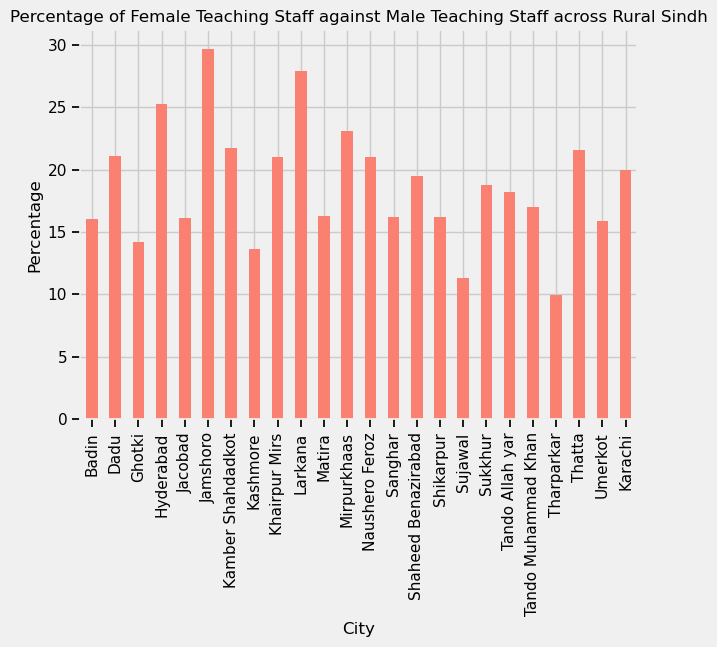

In [230]:
female_pct = rural_teachers['Female']/rural_teachers['Total']*100
female_pct.plot.bar(color = 'salmon')

plt.title("Percentage of Female Teaching Staff against Male Teaching Staff across Rural Sindh")
plt.ylabel("Percentage")
plt.xlabel("City")

# save the plot to a file

plt.savefig('female_pct_rural.png', bbox_inches='tight')

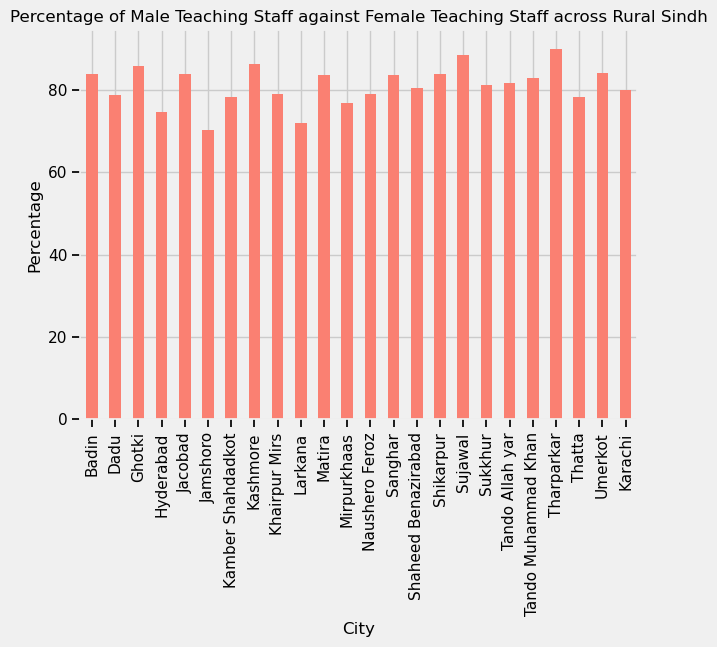

In [229]:
male_pct = rural_teachers['Male']/rural_teachers['Total']*100
male_pct.plot.bar(color = 'salmon')
plt.title("Percentage of Male Teaching Staff against Female Teaching Staff across Rural Sindh")
plt.ylabel("Percentage")
plt.xlabel("City")

# save the plot to a file

plt.savefig('male_pct_rural.png', bbox_inches='tight')

#lot of gender gap in teaching staff

In [201]:
##teaching staff discrepancies amongst districts and  urban
female_urban_teachers_HS = pivot[pivot.columns[1] ]
male_urban_teachers_HS =  pivot[pivot.columns[9] ]

female_urban_teachers_M = pivot[pivot.columns[3] ]
male_urban_teachers_M =  pivot[pivot.columns[11] ]

female_urban_teachers_P = pivot[pivot.columns[5] ]
male_urban_teachers_P =  pivot[pivot.columns[13] ]

female_urban_teachers_S = pivot[pivot.columns[7] ]
male_urban_teachers_S =  pivot[pivot.columns[15] ]

In [202]:
female_urban = female_urban_teachers_HS +female_urban_teachers_M +female_urban_teachers_P+female_urban_teachers_S
male_urban = male_urban_teachers_HS +male_urban_teachers_M +male_urban_teachers_P+male_urban_teachers_S

In [203]:
urban_teachers = pd.DataFrame({ 'Female' : female_urban , 'Male' : male_urban})

In [204]:
urban_teachers['Total'] = urban_teachers[['Female', 'Male']].sum(axis=1)

In [206]:
# add up rows 1, 3, 10, 12, 14, and 21
summed_row = urban_teachers.iloc[[1, 3, 10, 12, 14, 21]].sum(axis=0)

# assign the summed row to a new row in the DataFrame
urban_teachers.loc['Karachi'] = summed_row


In [207]:
urban_teachers = urban_teachers.drop(['Central Karachi', 'East Karachi', 'Korangi Karachi' , 'Malir Karachi' , 'West Karchi' , 'South Karachi'])

urban_teachers

,Female,Male,Total
District,,,
Badin,24.715769,45.386131,70.101900
Dadu,40.831702,78.889687,119.721390
Ghotki,14.760210,29.884870,44.645081
Hyderabad,173.315032,149.763829,323.078861
Jacobad,55.450826,111.100401,166.551227
Jamshoro,25.676087,68.670945,94.347032
Kamber Shahdadkot,37.060733,86.276194,123.336928
Kashmore,7.278523,18.050737,25.329260
Khairpur Mirs,30.486613,52.363773,82.850386


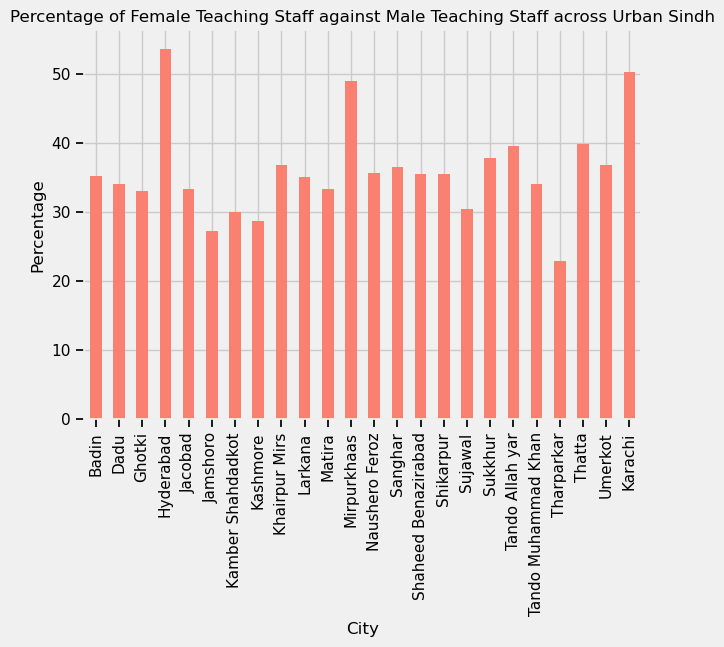

In [228]:
female_pct_urban = urban_teachers['Female']/urban_teachers['Total']*100
female_pct_urban.plot.bar(color='salmon')

plt.title("Percentage of Female Teaching Staff against Male Teaching Staff across Urban Sindh")
plt.ylabel("Percentage")
plt.xlabel("City")


# save the plot to a file

plt.savefig('female_pct_urban.png', bbox_inches='tight')

#lot of gender gap in teaching staff

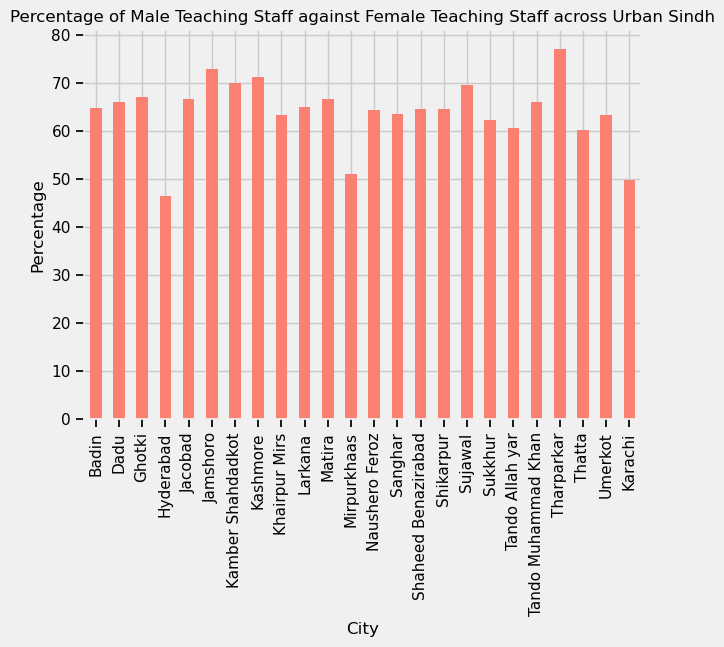

In [227]:
male_pct_urban = urban_teachers['Male']/urban_teachers['Total']*100
male_pct_urban.plot.bar(color = 'salmon')

plt.title("Percentage of Male Teaching Staff against Female Teaching Staff across Urban Sindh")
plt.ylabel("Percentage")
plt.xlabel("City")


plt.savefig('male_pct_urban.png', bbox_inches='tight')
#can see more homogenous and less discrepancy

### ENROllment rates (gender based)

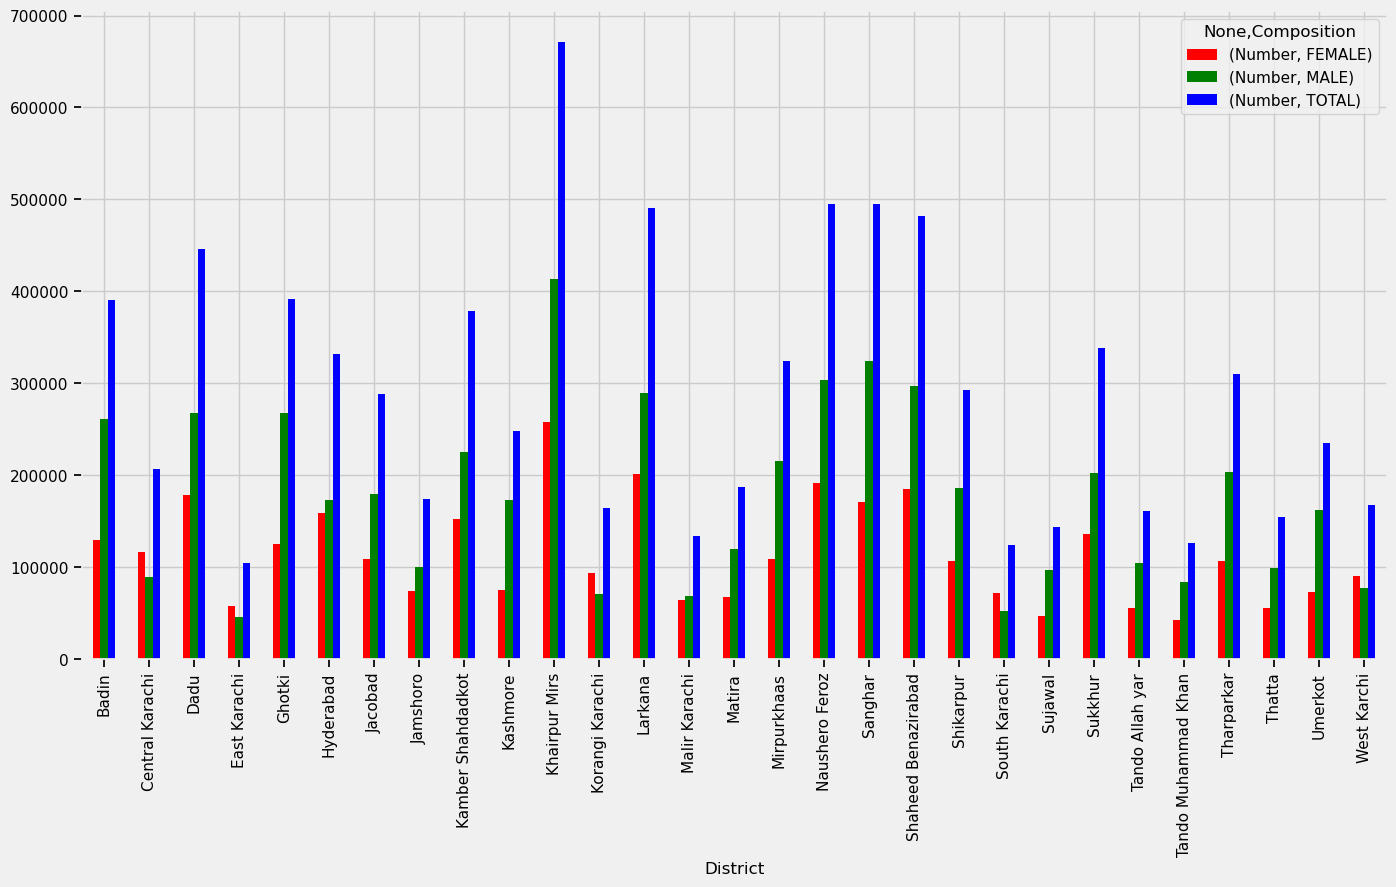

In [113]:
enrollment_info= sindhdata_enrollment[sindhdata_enrollment["Category"]=="ENROLMENT"]
enrollment_info=enrollment_info.drop(["No/100000"], axis=1)
enrollmentPlot= enrollment_info.groupby(["District","Composition"]).sum().unstack().plot(kind='bar', legend=True, color=['red', 'green', 'blue'], figsize=(15,8))


### Teaching Staff(Based on gender)

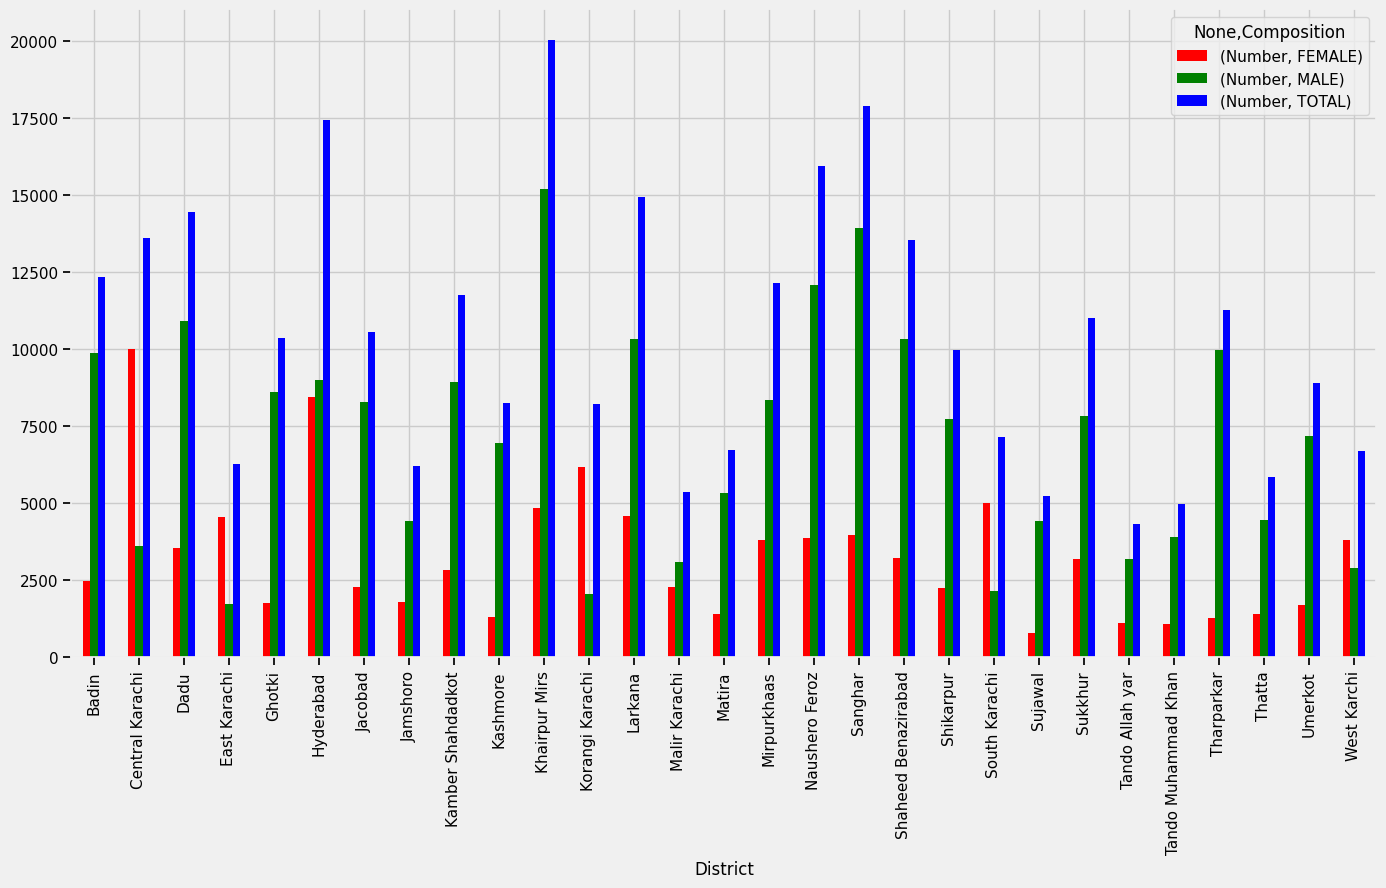

In [113]:
enrollment_info= sindhdata_enrollment[sindhdata_enrollment["Category"]=="TEACHING STAFF"]
enrollment_info=enrollment_info.drop(["No/100000"], axis=1)
teachingPlot= enrollment_info.groupby(["District","Composition"]).sum().unstack().plot(kind='bar', legend=True, color=['red', 'green', 'blue'], figsize=(15,8))